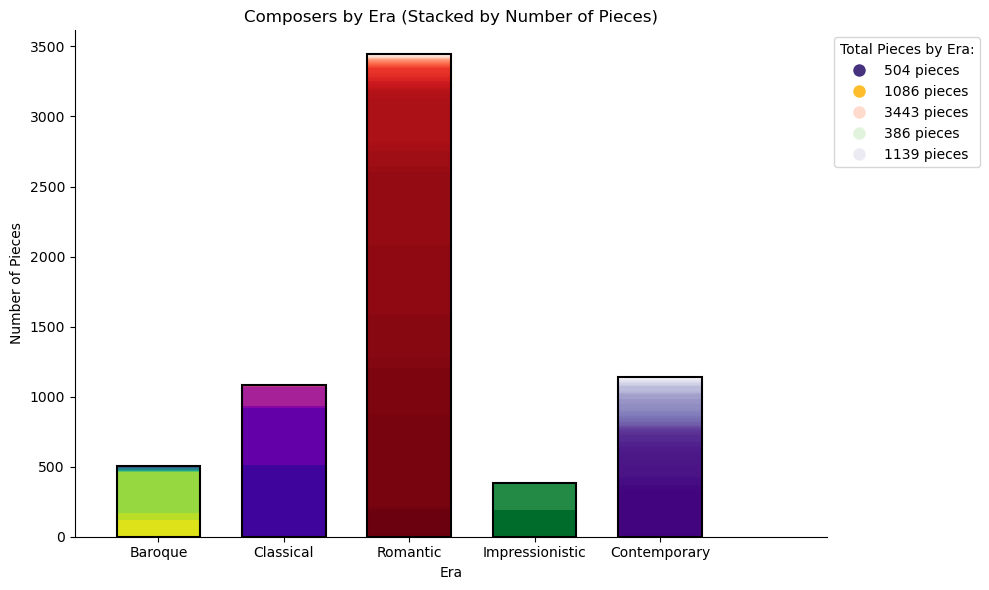

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter

df = pd.read_excel('Competition Final List.xlsx')
composers = df['Composer'].tolist()
eras = df['Column3'].tolist()

era_dict = {era: {} for era in ['Baroque', 'Classical', 'Romantic', 'Impressionistic', 'Contemporary']}
for composer, era in zip(composers, eras):
    if era in era_dict:
        era_dict[era][composer] = era_dict[era].get(composer, 0) + 1

fig, ax = plt.subplots(figsize=(10, 6))
era_list = ['Baroque', 'Classical', 'Romantic', 'Impressionistic', 'Contemporary']
base_colors = {
    'Baroque': 'plasma_r',
    'Classical': 'plasma_r',
    'Romantic': 'plasma_r',
    'Impressionistic': 'plasma_r',
    'Contemporary': 'plasma_r'
}

bottoms = np.zeros(len(era_list))
era_spacing = 3
bar_width = 2
x_positions = [i * era_spacing for i in range(len(era_list))]
bottoms = np.zeros(len(era_list))

total_pieces_per_era = {}

for i, era in enumerate(era_list):
    composers_in_era = era_dict[era]
    gradient_colors = sns.color_palette(base_colors[era], n_colors=len(composers_in_era))
    gradient_colors = gradient_colors[::-1]
    
    ##make interactive so you hover over and and can see what composer section corresponds to
    ##also gradient is very bad sorry 
    for j, (composer, count) in enumerate(composers_in_era.items()):
        ax.bar(x_positions[i], count, width=bar_width, bottom=bottoms[i], color=gradient_colors[j], label=composer if j == 0 else "")
        bottoms[i] += count

    ax.bar(x_positions[i], bottoms[i], width=bar_width, color='none', edgecolor='black', linewidth=1.5)
    total_pieces_per_era[era] = sum(composers_in_era.values())

ax.set_xticks(x_positions)
ax.set_xticklabels(era_list)
ax.set_xlim(-bar_width, x_positions[-1] + bar_width * 2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Era')
ax.set_ylabel('Number of Pieces')
ax.set_title('Composers by Era (Stacked by Number of Pieces)')

##this is the legend
handles = []
for era in era_list:
    color = sns.color_palette(base_colors[era])[0]
    handles.append(plt.Line2D([0], [0], marker='o', color='w', label=f'{total_pieces_per_era[era]} pieces',
                               markerfacecolor=color, markersize=10))

ax.legend(handles=handles, title='Total Pieces by Era:', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()
